# ARTIFICIAL INTELLIGENCE AND MACHINE LEARNING PROJECT WORK

We're working for the data science team of a prestigious fast fashion firm and our aim is to improve the recommender system in order to increase revenues. We will proceed by first making an analysis of the dataset and then selecting the important parts we need to build different recommendation systems and pick the most suitable one.

###  EDA (Explanatory Data Analysis)
Perform an Explanatory data analysis (EDA) with visualization using the entire dataset.

1) We import the libraries.

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Our dataset contains 3 files: "recsys_articles.csv", "recsys_customers.csv", "recsys_transactions.csv".
We start performing the EDA from "recsys_articles.csv". It represents all the articles that the firm sells and their features.

### ARTICLES

2) We import the dataset about articles and print the first 5 rows, then we use the shape and dtypes functions to understand the shape of the dataset and the data type of each column. As we can notice this dataset has a complex structure since there are lot of columns (21), actually some of them are useless as most attributes have "code" and "name" descriptions so we don't have to consider all of them. 

In [5]:
df_articles = pd.read_csv("recsys_articles.csv")
df_articles.head()

,article_id,prod_name,product_type,product_type_name,product_group_name,colour_group,colour_group_name,perceived_colour_value,perceived_colour_value_name,perceived_colour_master,...,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
0,0,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
1,1,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
2,2,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
3,3,200 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
4,4,Control Top 50 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights


In [ ]:
df_articles.shape

(6536, 21)

In [ ]:
df_articles.dtypes

article_id                       int64
prod_name                       object
product_type                     int64
product_type_name               object
product_group_name              object
colour_group                     int64
colour_group_name               object
perceived_colour_value           int64
perceived_colour_value_name     object
perceived_colour_master          int64
perceived_colour_master_name    object
department                       int64
department_name                 object
index                           object
index_name                      object
index_group                      int64
index_group_name                object
section                          int64
section_name                    object
garment_group                    int64
garment_group_name              object
dtype: object

3) We now want to see which column contains NaN values, but we're lucky beacuse we don't have them.

In [ ]:
df_articles.isnull().sum()

article_id                      0
prod_name                       0
product_type                    0
product_type_name               0
product_group_name              0
colour_group                    0
colour_group_name               0
perceived_colour_value          0
perceived_colour_value_name     0
perceived_colour_master         0
perceived_colour_master_name    0
department                      0
department_name                 0
index                           0
index_name                      0
index_group                     0
index_group_name                0
section                         0
section_name                    0
garment_group                   0
garment_group_name              0
dtype: int64

Through the function nunique( ) we can see the number of distinct elements for each column and through a deeper analysis we find out that some columns present values like '-1', 'Unknown' or 'undefined'.

In [ ]:
df_articles.nunique()

article_id                      6536
prod_name                       3684
product_type                      82
product_type_name                 82
product_group_name                12
colour_group                      46
colour_group_name                 46
perceived_colour_value             7
perceived_colour_value_name        7
perceived_colour_master           18
perceived_colour_master_name      18
department                       182
department_name                  144
index                              9
index_name                         9
index_group                        5
index_group_name                   5
section                           43
section_name                      43
garment_group                     21
garment_group_name                21
dtype: int64

In [ ]:
df_articles["product_type"].unique()

array([304, 273, 532, 252, 306, 302,  -1,  67,  72,  73, 275, 265, 308,
        81, 286, 262, 277, 255, 272, 263, 257, 254,  86,  59,  70, 509,
        66, 259, 274, 253, 499, 289, 512, 291, 256, 296, 298,  57, 264,
       245, 258, 283,  87,  94, 297,  76,  80,  75, 496, 299,  78,  69,
        74, 508, 476, 267,  77, 271,  71, 305, 293, 475,  88, 276,  90,
        92, 144, 300,  93,  79, 268, 529,  84,  91, 270, 261, 230,  89,
       511, 465, 521,  68])

In [ ]:
df_articles["product_type_name"].unique()

array(['Underwear Tights', 'Leggings/Tights', 'Umbrella', 'Sweater',
       'Bra', 'Socks', 'Unknown', 'Belt', 'Hair clip', 'Hair string',
       'Skirt', 'Dress', 'Hoodie', 'Sunglasses', 'Underwear bottom',
       'Jacket', 'Costumes', 'T-shirt', 'Trousers', 'Coat', 'Polo shirt',
       'Top', 'Ballerinas', 'Swimwear bottom', 'Earring', 'Felt hat',
       'Bag', 'Shirt', 'Shorts', 'Vest top', 'Braces', 'Nipple covers',
       'Hair ties', 'Bra extender', 'Bodysuit', 'Pyjama bottom',
       'Bikini top', 'Swimsuit', 'Blazer', 'Cardigan', 'Blouse',
       'Underwear body', 'Boots', 'Sneakers', 'Pyjama set', 'Hat/brim',
       'Scarf', 'Hat/beanie', 'Beanie', 'Swimwear set',
       'Other accessories', 'Cap/peaked', 'Hair/alice band', 'Earrings',
       'Shoulder bag', 'Jumpsuit/Playsuit', 'Necklace', 'Outdoor overall',
       'Gloves', 'Robe', 'Night gown', 'Tote bag', 'Flip flop',
       'Outdoor trousers', 'Pumps', 'Heeled sandals', 'Flat shoe',
       'Sarong', 'Slippers', 'Ring', 'D

In [ ]:
df_articles["product_group_name"].unique()

array(['Socks & Tights', 'Garment Lower body', 'Items',
       'Garment Upper body', 'Underwear', 'Unknown', 'Accessories',
       'Garment Full body', 'Shoes', 'Swimwear', 'Nightwear', 'Bags'],
      dtype=object)

In [ ]:
df_articles["perceived_colour_master_name"].unique()

array(['Black', 'Blue', 'Grey', 'Beige', 'White', 'Brown', 'Mole',
       'Khaki green', 'Red', 'Metal', 'Lilac Purple', 'Yellow', 'Pink',
       'undefined', 'Unknown', 'Green', 'Orange', 'Turquoise'],
      dtype=object)

In [ ]:
df_articles["garment_group_name"].unique()

array(['Socks and Tights', 'Accessories', 'Jersey Fancy',
       'Under-, Nightwear', 'Jersey Basic', 'Outdoor', 'Trousers',
       'Trousers Denim', 'Shoes', 'Swimwear', 'Shirts', 'Blouses',
       'Knitwear', 'Dresses Ladies', 'Dressed', 'Shorts',
       'Special Offers', 'Skirts', 'Woven/Jersey/Knitted mix Baby',
       'Unknown', 'Dresses/Skirts girls'], dtype=object)

We calculate the percentage of unknown elements for the columns that present these values and create a new dataset 'articles' without those articles.

In [ ]:
Unknown_product_type_name = df_articles.loc[(df_articles.product_type_name == "Unknown")]
Unknown_product_group_name = df_articles.loc[(df_articles.product_group_name == "Unknown")]
Unknown_perceived_colour_master_name = df_articles.loc[(df_articles.perceived_colour_master_name == "Unknown")]
Unknown_garment_group_name = df_articles.loc[(df_articles.garment_group_name == "Unknown")]
Undefined_perceived_colour_master_name = df_articles.loc[(df_articles.perceived_colour_master_name == "undefined")]
print(f'The percentage of unknown product type name is: {round((len(Unknown_product_type_name)/len(df_articles)*100),2)}%')
print(f'The percentage of unknown product group name is: {round((len(Unknown_product_group_name)/len(df_articles)*100),2)}%')
print(f'The percentage of unknown perceived colour master name is: {round((len(Unknown_perceived_colour_master_name)/len(df_articles)*100),2)}%')
print(f'The percentage of unknown garment group name is: {round((len(Unknown_garment_group_name)/len(df_articles)*100),2)}%')
print(f'The percentage of undefined perceived colour master name is: {round((len(Undefined_perceived_colour_master_name)/len(df_articles)*100),2)}%')

The percentage of unknown product type name is: 1.03%
The percentage of unknown product group name is: 1.03%
The percentage of unknown perceived colour master name is: 0.92%
The percentage of unknown garment group name is: 1.19%
The percentage of undefined perceived colour master name is: 0.08%


In [6]:
articles = df_articles[df_articles.product_type_name != "Unknown"]
articles = articles[articles.product_group_name != "Unknown"]
articles = articles[articles.perceived_colour_master_name != "Unknown"]
articles = articles[articles.garment_group_name != "Unknown"]
articles = articles[articles.perceived_colour_master_name != "undefined"]
print(f"New dataset contains {len(articles)} articles")

New dataset contains 6328 articles


4) We can now divide articles for their features starting from the division in types.

### PRODUCT TYPES

We import Counter which help us understanding how many articles of that specific type are present in our dataset, in this way we create a new dataframe that we're going to plot then. In this case the product type with more articles is 'Trousers' with 942 articles.

In [ ]:
from collections import Counter
product_type_name = Counter(articles["product_type_name"])
prod_type = pd.DataFrame([product_type_name]).T.reset_index()
prod_type.columns = ("Type","Count")
prod_type = prod_type.sort_values(by="Count", ascending = False)
prod_type

,Type,Count
17,Trousers,942
3,Sweater,613
10,Dress,561
20,Top,418
16,T-shirt,376
...,...,...
48,Swimwear set,1
15,Costumes,1
29,Braces,1
30,Nipple covers,1


Visual representation :

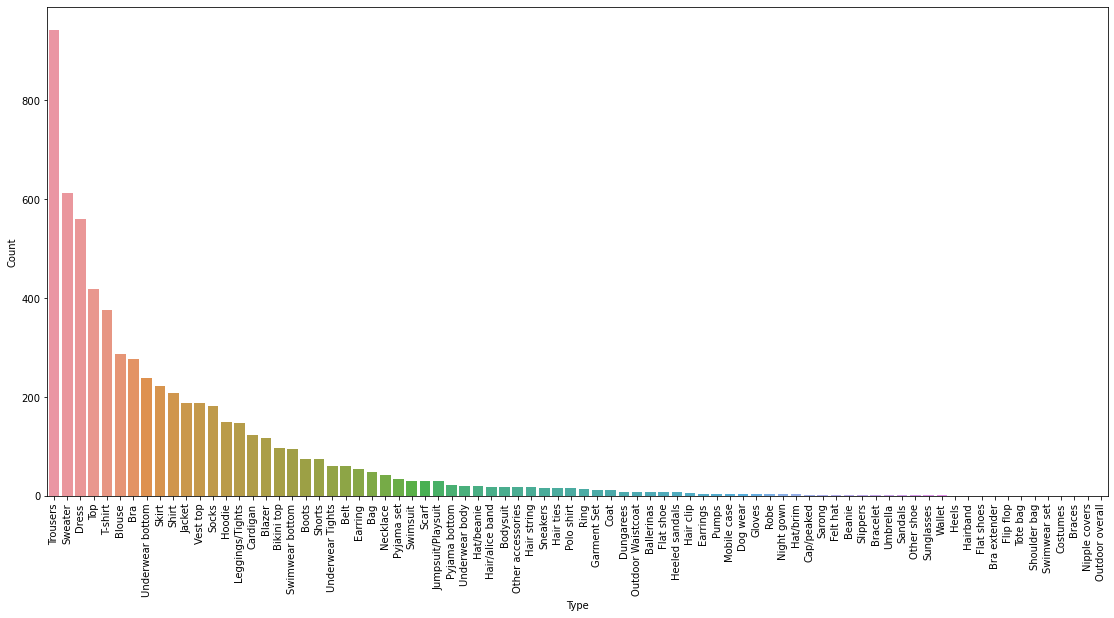

In [ ]:
plt.figure(figsize=(19,9))
sns.barplot(x='Type', y='Count', data=prod_type)
plt.xticks(rotation=90)
plt.show()

### PRODUCT GROUPS

Having 80 different types of products can be useful but in order to make data more interpretable we divide articles according to their product group. We see that the more relevant group with more articles in the dataset is 'Garment Upper body' with 2727.

In [ ]:
product_group_name = Counter(articles["product_group_name"])
prod_group = pd.DataFrame([product_group_name]).T.reset_index()
prod_group.columns = ("Group","Count")
prod_group = prod_group.sort_values(by="Count", ascending = False)
prod_group

,Group,Count
3,Garment Upper body,2727
1,Garment Lower body,1388
6,Garment Full body,615
4,Underwear,543
5,Accessories,378
0,Socks & Tights,244
8,Swimwear,228
7,Shoes,133
9,Nightwear,60
2,Items,10


We plot the results and immediately notice how this time we have a simpler representation of the articles since we have only 11 groups in which they can be divided.

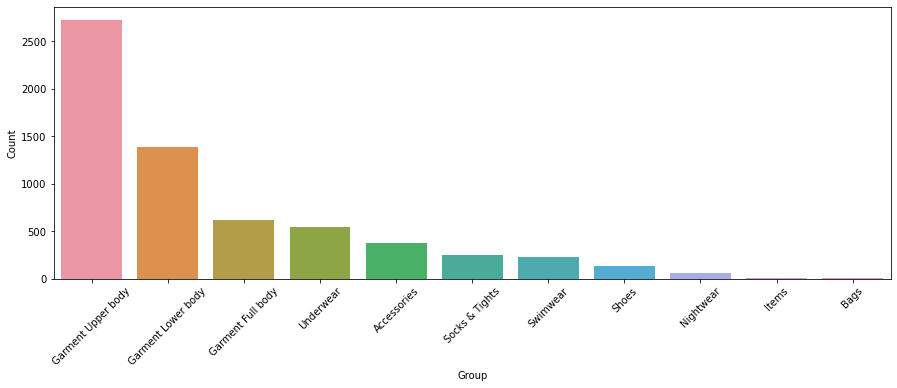

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Group', y='Count', data=prod_group)
plt.xticks(rotation=45)
plt.show()

### COLOUR

In the original dataset colours of the articles are described by several attributes, without taking in consideration integer data types the colour is described by: 'colour_group_name','perceived_colour_value_name' and 'perceived_colour_master_name'. Looking at the plots it was easy for us to notice how the attribute that can intepret better data is 'perceived_colour_master_name'(16 values) as 'colour_group_name' and 'perceived_colour_value_name' either have too much values or not so many.

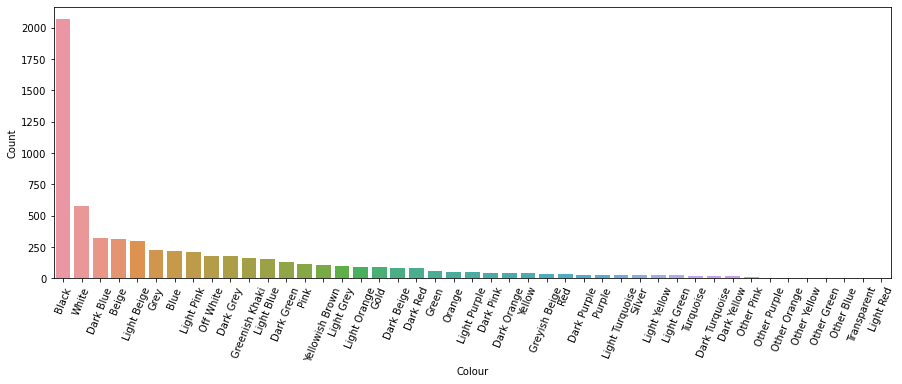

In [ ]:
colour_group_name = Counter(articles["colour_group_name"])
colour_group = pd.DataFrame([colour_group_name]).T.reset_index()
colour_group.columns = ("Colour","Count")
colour_group = colour_group.sort_values(by="Count", ascending = False)
plt.figure(figsize=(15,5))
sns.barplot(x='Colour', y='Count', data=colour_group)
plt.xticks(rotation=68)
plt.show()

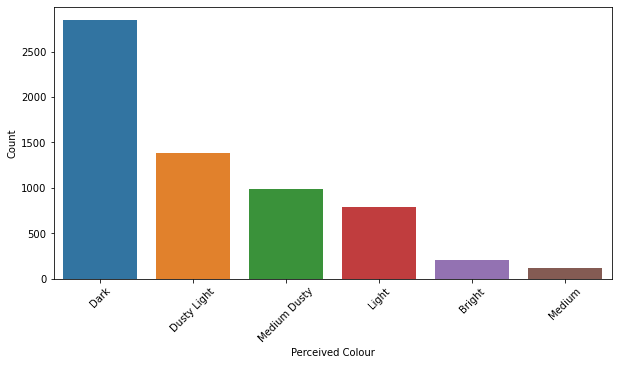

In [ ]:
perceived_colour_value_name = Counter(articles["perceived_colour_value_name"])
perceived_colour = pd.DataFrame([perceived_colour_value_name]).T.reset_index()
perceived_colour.columns = ("Perceived Colour","Count")
perceived_colour = perceived_colour.sort_values(by="Count", ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x='Perceived Colour', y='Count', data=perceived_colour)
plt.xticks(rotation=45)
plt.show()

The vast majority of articles are black.

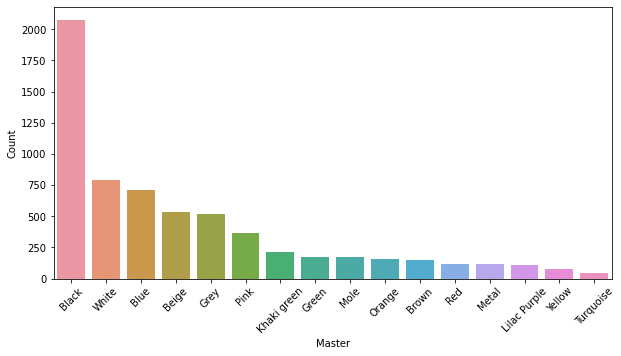

In [ ]:
perceived_colour_master_name = Counter(articles["perceived_colour_master_name"])
master = pd.DataFrame([perceived_colour_master_name]).T.reset_index()
master.columns = ("Master","Count")
master = master.sort_values(by="Count", ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x='Master', y='Count', data=master)
plt.xticks(rotation=45)
plt.show()

### DEPARTMENT

We continue dividing articles according to their features, in this case the department with more articles is 'Jersey', although 138 departments are not so useful to categorize data.

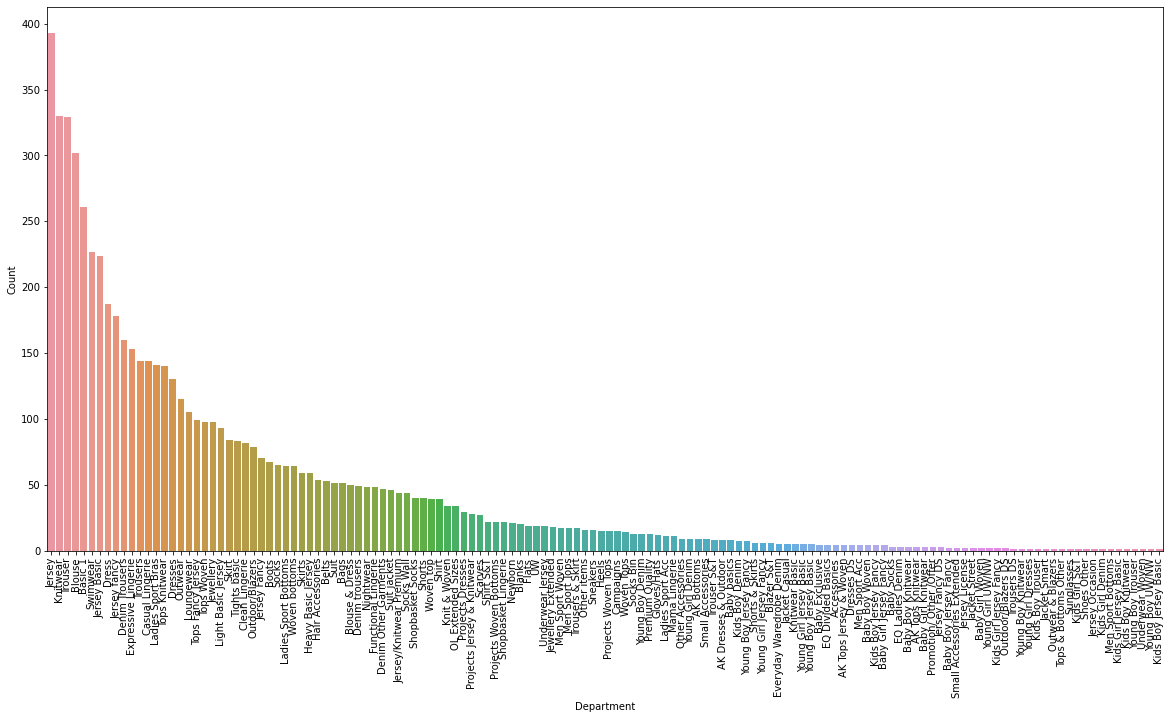

In [ ]:
department_name = Counter(articles["department_name"])
department = pd.DataFrame([department_name]).T.reset_index()
department.columns = ("Department","Count")
department = department.sort_values(by="Count", ascending = False)
plt.figure(figsize=(20,10))
sns.barplot(x='Department', y='Count', data=department)
plt.xticks(rotation=90)
plt.show()

### INDEX

Articles are divided in 'index_name' and 'index_group_name' which are quite the same, they both have few values and for this reason they're not so perfect to build our recommender system but they are useful in the visualization of data. 
The index with the highest number of articles is 'Ladieswear'.

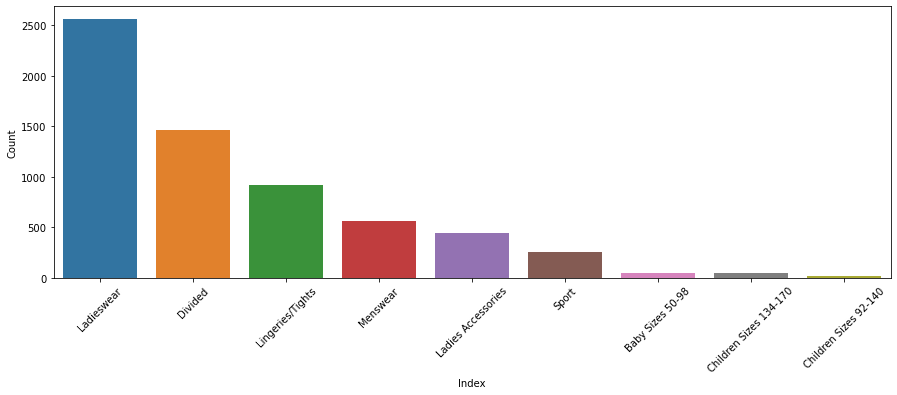

In [ ]:
index_name = Counter(articles["index_name"])
index = pd.DataFrame([index_name]).T.reset_index()
index.columns = ("Index","Count")
index = index.sort_values(by="Count", ascending = False)
plt.figure(figsize=(15,5))
sns.barplot(x='Index', y='Count', data=index)
plt.xticks(rotation=45)
plt.show()

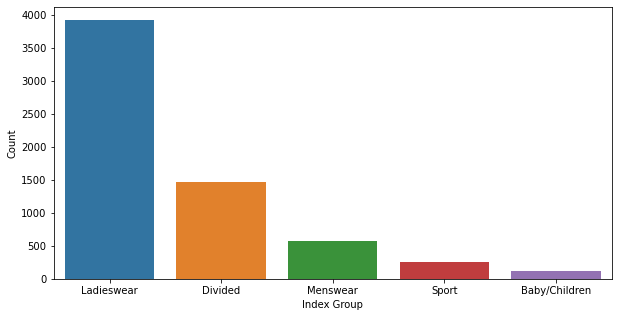

In [ ]:
index_group_name = Counter(articles["index_group_name"])
index_group = pd.DataFrame([index_group_name]).T.reset_index()
index_group.columns = ("Index Group","Count")
index_group = index_group.sort_values(by="Count", ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x='Index Group', y='Count', data=index_group)
plt.xticks(rotation=0)
plt.show()

### SECTION

We have 42 sections in which we divide articles, in this case we plot only the 5 sections with the highest number of articles, the section with the most articles is 'Womens Everyday Collection' with 856.

In [ ]:
section_name = Counter(articles["section_name"])
section = pd.DataFrame([section_name]).T.reset_index()
section.columns = ("Section","Count")
section = section.sort_values(by="Count", ascending = False)
section.head()

,Section,Count
19,Womens Everyday Collection,856
22,Divided Collection,763
26,Womens Tailoring,514
3,Womens Lingerie,460
0,"Womens Nightwear, Socks & Tigh",338


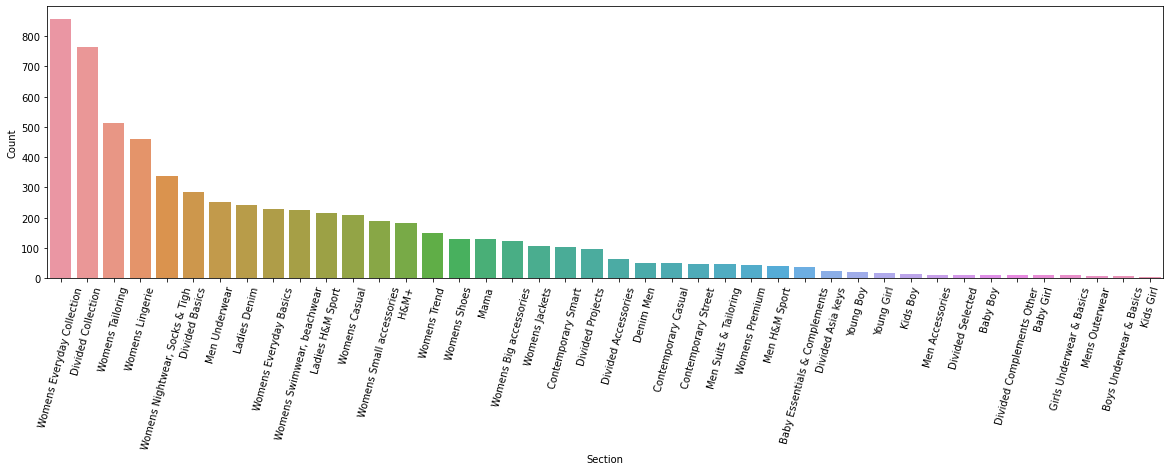

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Section', y='Count', data=section)
plt.xticks(rotation=75)
plt.show()

### GARMENT

Probably better to group data resepect to 'section' that has too many values. For this reason we decided to pick it to build our model.

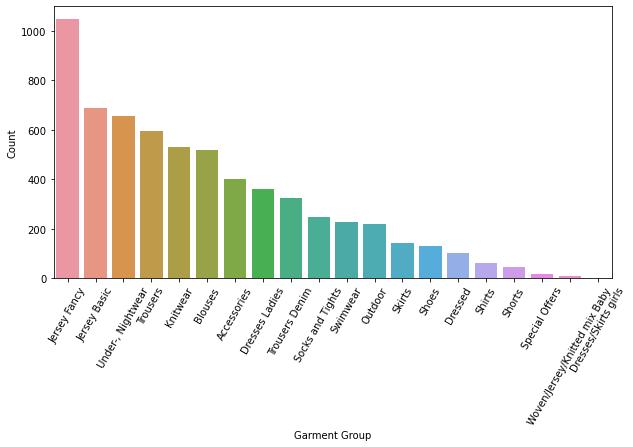

In [ ]:
garment_group_name = Counter(articles["garment_group_name"])
garment_group = pd.DataFrame([garment_group_name]).T.reset_index()
garment_group.columns = ("Garment Group","Count")
garment_group = garment_group.sort_values(by="Count", ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x='Garment Group', y='Count', data=garment_group)
plt.xticks(rotation=60)
plt.show()

We've finished creating the dataframe for each feature that describes articles in our dataset and we can now decide which of them to take in consideration for our recommender system. We started with the articles' dataset because we only need this to create our first recommender system which is going to be the Content-Based Filtering. This means that we don't need to analyse the other 2 files beacuse we only need articles' features in order to build it.

## CONTENT-BASED FILTERING RECOMMENDER SYSTEM

In order to build a content-based filtering recommender, we need to set up our dataset so that rows represent articles and columns represent the features we're interested in.

First we need to manipulate the product_type_name column so that each product type is represented as a binary feature. '1' indicates that the article falls under that type, while '0' means doesn't.

In [ ]:
product_type_name = Counter(articles["product_type_name"])
prod_type = list(product_type_name.keys())
for p in prod_type:
    articles[p] = articles['product_type_name'].transform(lambda x: int(p in x))
articles[prod_type].head()

,Underwear Tights,Leggings/Tights,Umbrella,Sweater,Bra,Socks,Belt,Hair clip,Hair string,Skirt,...,Wallet,Sandals,Garment Set,Outdoor Waistcoat,Heels,Other shoe,Hairband,Flat shoes,Dog wear,Bracelet
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We do the same thing for 'product_group_name', 'perceived_colour_master_name' and 'garment_group_name'.

In [ ]:
product_group_name = Counter(articles["product_group_name"])
prod_group = list(product_group_name.keys())
for g in prod_group:
    articles[g] = articles['product_group_name'].transform(lambda x: int(p in x))
articles[prod_group].head()

,Socks & Tights,Garment Lower body,Items,Garment Upper body,Underwear,Accessories,Garment Full body,Shoes,Swimwear,Nightwear,Bags
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
perceived_colour_master_name = Counter(articles["perceived_colour_master_name"])
perceived_colour = list(perceived_colour_master_name.keys())
for c in perceived_colour:
    articles[c] = articles["perceived_colour_master_name"].transform(lambda x: int(c in x))
articles[perceived_colour].head()

,Black,Blue,Grey,Beige,White,Brown,Mole,Khaki green,Red,Metal,Lilac Purple,Yellow,Pink,Green,Orange,Turquoise
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
garment_group_name = Counter(articles["garment_group_name"])
garment = list(garment_group_name.keys())
for g in garment:
    articles[g] = articles["garment_group_name"].transform(lambda x: int(s in x))
articles[garment].head()

,Socks and Tights,Accessories,Jersey Fancy,"Under-, Nightwear",Jersey Basic,Outdoor,Trousers,Trousers Denim,Shoes,Swimwear,Shirts,Blouses,Knitwear,Dresses Ladies,Dressed,Shorts,Special Offers,Skirts,Woven/Jersey/Knitted mix Baby,Dresses/Skirts girls
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can merge all these features in a unique dataframe 'article_features'.

In [ ]:
article_features = pd.concat([articles[prod_type],articles[prod_group],articles[perceived_colour],articles[garment]],axis=1)
article_features.head()

,Underwear Tights,Leggings/Tights,Umbrella,Sweater,Bra,Socks,Belt,Hair clip,Hair string,Skirt,...,Shirts,Blouses,Knitwear,Dresses Ladies,Dressed,Shorts,Special Offers,Skirts,Woven/Jersey/Knitted mix Baby,Dresses/Skirts girls
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finally we can use a similarity metric called cosine similarity to build our recommender system.

Cosine similarity looks at the cosine angle between two vectors. The smaller the cosine angle, the higher the degree of similarity. The cosine similarity matrix has shape n_articles x n_articles (6328 x 6328). 

With this cosine similarity matrix, we'll be able to extract articles that are most similar to the article of interest.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(article_features, article_features)
print(f"Dimensions of our article features cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our article features cosine similarity matrix: (6328, 6328)


When we're going to recommend articles to our customer, our recommender system is going to give information about the article of interest and the articles recommended. For this reason we're going to need this dictionaries that simply match the article_id to its prod_name, prod_type_name, prod_group_name, perceived_colour, garment, except for article_id_dict that matches each prod_name to its article_id.

In [ ]:
article_id_dict = {}
prod_name_dict = {}
prod_type_name_dict = {}
prod_group_name_dict = {}
perceived_colour_dict = {}
section_dict = {}
garment_dict = {}
for i,row in articles.iterrows():
    article_id_dict[row["prod_name"]] = row["article_id"]
    prod_name_dict[row["article_id"]]=row["prod_name"]
    prod_type_name_dict[row["article_id"]]=row["product_type_name"]
    prod_group_name_dict[row["article_id"]]=row["product_group_name"]
    perceived_colour_dict[row["article_id"]]=row["perceived_colour_master_name"]
    section_dict[row["article_id"]]=row["section_name"]
    garment_dict[row["article_id"]]=row["garment_group_name"]


We then create a function that takes as input the article id and the number of similar items we desire to recommend. 

We take the row of the similarity matrix associated to our article and we sort the elements in decreasing order. Finally we can just take the items we are interested to.

In [ ]:
def get_content_based_recommendations(art_id,n:int):
    id = articles[articles["article_id"] == art_id].index
    sim_scores = np.argsort(cosine_sim[id])[0]
    sim_scores = sim_scores[::-1][1:n+1]
    
    if n<1:
        print("Please select at least one article to be recommended")
    if n==1:
        ind = sim_scores[0]
        main = articles["prod_name"].iloc[ind]
        art_recom_id = article_id_dict[main]
        print(f"Here there is some information regarding {prod_name_dict[art_id]}:\n")
        print(f"Colour: {perceived_colour_dict[art_id]}, Type: {prod_type_name_dict[art_id]}, Garment: {garment_dict[art_id]}, ID: {art_id} \n")
        print(f"Here you find the main recommendation for it: {main} \n")
        print(f"Here there is some information regarding {main} \n")
        print(f"Colour: {perceived_colour_dict[art_recom_id]}, Type: {prod_type_name_dict[art_recom_id]}, Garment: {garment_dict[art_recom_id]}, ID: {art_recom_id} \n")
    if n>1:
        top_rec = list(articles["prod_name"].iloc[[i for i in sim_scores]])
        print(f"Here there is some information regarding {prod_name_dict[art_id]}:\n")
        print(f"Colour: {perceived_colour_dict[art_id]}, Type: {prod_type_name_dict[art_id]}, Garment: {garment_dict[art_id]}, ID: {art_id} \n")
        print(f"\n Here you find the top {n} articles recommended for: {prod_name_dict[art_id]}\n")
        print(articles["prod_name"].iloc[[i for i in sim_scores]])
        for i in top_rec:
            art_recom_id = article_id_dict[i]
            print(f"Here there is some information regarding {i} \n")
            print(f"Colour: {perceived_colour_dict[art_recom_id]}, Type: {prod_type_name_dict[art_recom_id]}, Garment: {garment_dict[art_recom_id]}, ID: {art_recom_id} \n")
            

In [ ]:
art_id = 25
get_content_based_recommendations(art_id,10)

Here there is some information regarding Austin basic leather hip belt:

Colour: Brown, Type: Belt, Garment: Accessories, ID: 25 


 Here you find the top 10 articles recommended for: Austin basic leather hip belt

4149    Morris elastic waist
5320          Swirl hip belt
5318         Rome PU elastic
5119     Jones elastic waist
1401      Big Ringo hip belt
3396            Denver waist
792      Topher Leather Belt
1739        VIVECKA belt (W)
3216      Ryan elastic waist
5461          Alcatraz waist
Name: prod_name, dtype: object
Here there is some information regarding Morris elastic waist 

Colour: Black, Type: Belt, Garment: Accessories, ID: 4149 

Here there is some information regarding Swirl hip belt 

Colour: Black, Type: Belt, Garment: Accessories, ID: 5320 

Here there is some information regarding Rome PU elastic 

Colour: Black, Type: Belt, Garment: Accessories, ID: 5318 

Here there is some information regarding Jones elastic waist 

Colour: Beige, Type: Belt, Garment: Acce

Next recommender system we would like to build is going to be Collaborative filtering which is user-based, this means that we need first to analyse the other 2 files. We import the dataset about customers.

## CUSTOMERS

1) Import the dataset, print the first 5 rows, take a look at the shape and the data types of its columns. As we can notice this dataset is simpler than the first one, we only have the unique customer identifier, then we know if he/she is subscribed to the newsletter ('1'=yes, '0'=no) and if is part of the special club member ('1'=yes, '0'=no), finally we know the age.

In [8]:
df_customers = pd.read_csv("recsys_customers.csv")
df_customers.head()

,customer_id,fashion_news,club_member,age
0,0,1,1,44.0
1,1,1,1,33.0
2,2,0,0,29.0
3,3,0,0,21.0
4,4,0,0,23.0


In [ ]:
df_customers.shape

(41253, 4)

In [ ]:
df_customers.dtypes

customer_id       int64
fashion_news      int64
club_member       int64
age             float64
dtype: object

As before we look for NaN values in the dataset and this time we find out that 133 customers have NaN values for the age.

In [ ]:
df_customers.isnull().sum()

customer_id       0
fashion_news      0
club_member       0
age             133
dtype: int64

To replace NaN values in the 'age' column, we subdivide the dataset into 4 customer segments and we check how NaN values are distributed among the segments, then compute the **mode** age for each one and replace null with it. The segments will be the following:
- NOT subscribed to the newsletter & NOT member of the club
- NOT subscribed to the newsletter & member of the club
- subscribed to the newsletter & NOT member of the club
- subscribed to the newsletter & member of the club

NaN values are only in the segments of customers that are either subscribed to both the newsletter and the club or to none of them.

In [ ]:
segment00 = df_customers.loc[(df_customers.fashion_news == 0) & (df_customers.club_member == 0) & (df_customers.isnull().any(axis=1))]
segment01 = df_customers.loc[(df_customers.fashion_news == 0) & (df_customers.club_member == 1) & (df_customers.isnull().any(axis=1))]
segment10 = df_customers.loc[(df_customers.fashion_news == 1) & (df_customers.club_member == 0) & (df_customers.isnull().any(axis=1))]
segment11 = df_customers.loc[(df_customers.fashion_news == 1) & (df_customers.club_member == 1) & (df_customers.isnull().any(axis=1))]

print("Null in segment 00:",len(segment00))
print("Null in segment 01:",len(segment01))
print("Null in segment 10:",len(segment10))
print("Null in segment 11:",len(segment11))

Null in segment 00: 103
Null in segment 01: 0
Null in segment 10: 0
Null in segment 11: 30


After we compute the mode for the segments that present NaN values. We find that the mode for customers that are not subscribed to the newsletter and not member of club is 26, while the mode of customers subscribed to both is 24.

In [ ]:
normal_segment00 = df_customers.loc[(df_customers.fashion_news == 0) & (df_customers.club_member == 0)]
normal_segment11 = df_customers.loc[(df_customers.fashion_news == 1) & (df_customers.club_member == 1)]
normal_segment00_mode = round(normal_segment00.age.mode())
normal_segment11_mode = round(normal_segment11.age.mode())
print(f'Segment 00 median: {normal_segment00_mode}')
print(f'Segment 11 median: {normal_segment11_mode}')

Segment 00 median: 0    26.0
dtype: float64
Segment 11 median: 0    24.0
dtype: float64


Since we need to keep those customers in the dataset without cutting them, we just substitute the NaN values of segment00 with 26 and the NaN values of segment11 with 24. In this way we have preserved data by filling NaN values with the most common values for age.

In [ ]:
df_customers.age.loc[(df_customers.fashion_news == 0) & (df_customers.club_member == 0) & (df_customers.isnull().any(axis=1))] = 26
df_customers.age.loc[(df_customers.fashion_news == 1) & (df_customers.club_member == 1) & (df_customers.isnull().any(axis=1))] = 24


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


We check if it has worked and fortunately there are no other NaN values.

In [ ]:
df_customers.isnull().sum()

customer_id     0
fashion_news    0
club_member     0
age             0
dtype: int64

### AGE

Through the function dtypes we discovered that the data type of column 'age' is float and we want to convert it into integer.

In [ ]:
df_customers["age"] = df_customers["age"].apply(lambda x: int(x))
df_customers.head()

,customer_id,fashion_news,club_member,age
0,0,1,1,44
1,1,1,1,33
2,2,0,0,29
3,3,0,0,21
4,4,0,0,23


Our dataset contains informations about lots of customers and we want to group them according to their age, although we have lots of different ages. As we can see using the function describe( ) the minimum age recorded is 16 while the maximum age recorded is 91 and a really interesting fact is that 75% of the customers has less than 46 years. 

In [ ]:
df_customers["age"].describe()

count    41253.000000
mean        35.289191
std         12.657879
min         16.000000
25%         25.000000
50%         31.000000
75%         46.000000
max         91.000000
Name: age, dtype: float64

As we also have done before we use Counter to count how many customers have a specified age, we create a dataframe for it 'age' and plot the results. First thing we notice is that, although the maximum age recorded is 91, there are very few customers which have more than 70 years.

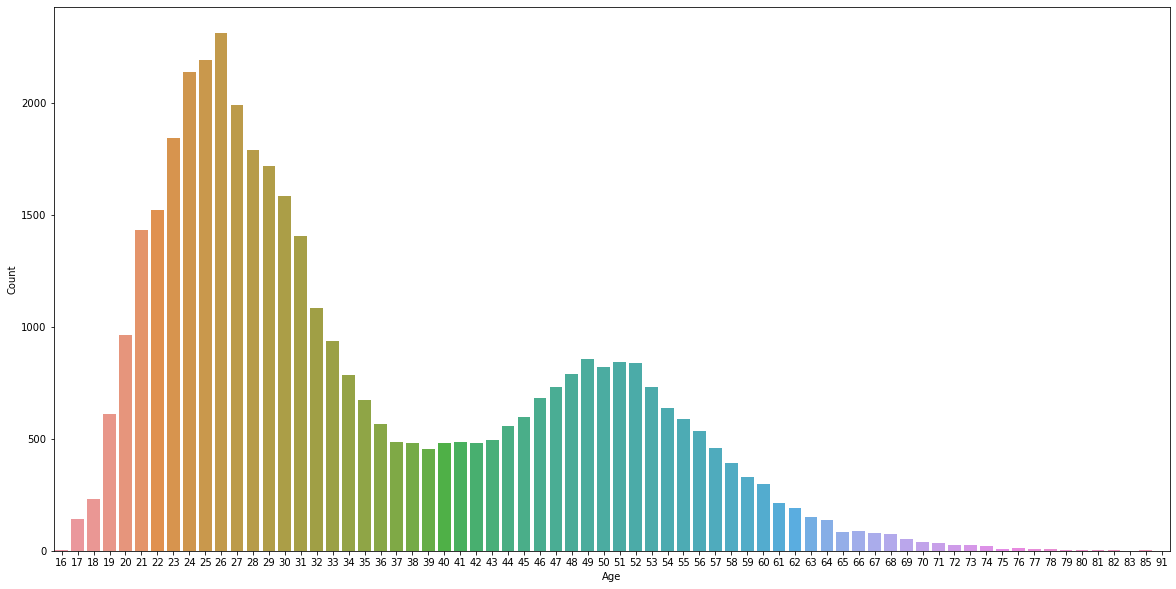

In [ ]:
age_count = Counter(df_customers["age"])
age = pd.DataFrame([age_count]).T.reset_index()
age.columns = ("Age","Count")
age = age.sort_values( by="Age",ascending = True)
plt.figure(figsize=(20,10))
sns.barplot(x='Age', y='Count', data=age)
plt.xticks(rotation=0)
plt.show()

Something that can be useful when we want to categorize customers is to assign to each of them an age group under which he/she falls. This would make our data more interpretable and less caothic and would totally helps us building the user-based recommender system. 

We proceed in this way creating age ranges of more or less 10 years until we reach 65 (since there are few customers we simply assign the group '65+'). Afterwards we add the new column age_group to the dataset.

In [ ]:
bins = [15,25,35,45,55,65,92]
groups = ["15-24","25-34","35-44","45-54","55-64","65+"]
df_customers["age_group"]=pd.cut(df_customers.age,bins,labels=groups, include_lowest=True)
df_customers

,customer_id,fashion_news,club_member,age,age_group
0,0,1,1,44,35-44
1,1,1,1,33,25-34
2,2,0,0,29,25-34
3,3,0,0,21,15-24
4,4,0,0,23,15-24
...,...,...,...,...,...
41248,41248,1,1,33,25-34
41249,41249,0,0,25,15-24
41250,41250,1,1,20,15-24
41251,41251,1,1,29,25-34


In order to understand better the distribution of age groups we use Counter to count how many times that age_group appears and create a dataframe for it. 

In [ ]:
group = Counter(df_customers["age_group"])
age_groups = pd.DataFrame([group]).T.reset_index()
age_groups.columns = ("Age Group","Count")
age_groups = age_groups.sort_values(by="Age Group",ascending=True)
age_groups

,Age Group,Count
2,15-24,11076
1,25-34,14272
0,35-44,5088
3,45-54,7517
4,55-64,2791
5,65+,509


We plot our results and notice that the groups with the highest number of customers are '15-24' and '25-34', this means lots of young customers respect to old ones.

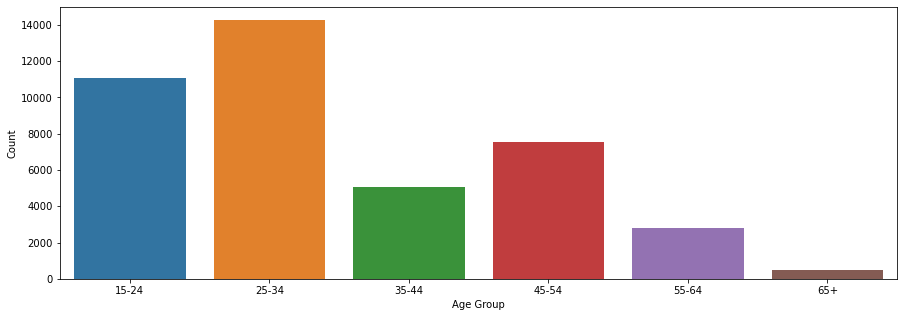

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age Group', y='Count', data=age_groups)
plt.xticks(rotation=0)
plt.show()

### FASHION NEWS

We want now to concentrate on the fashion_news feature, to have a better understanding of how many customers are subscribed we use Counter, create a dataframe and plot it. We find out that there are more customers that are not subscribed than the ones that are subscribed. 

In [ ]:
fashion_news = Counter(df_customers["fashion_news"])
fashion_news

Counter({1: 18213, 0: 23040})

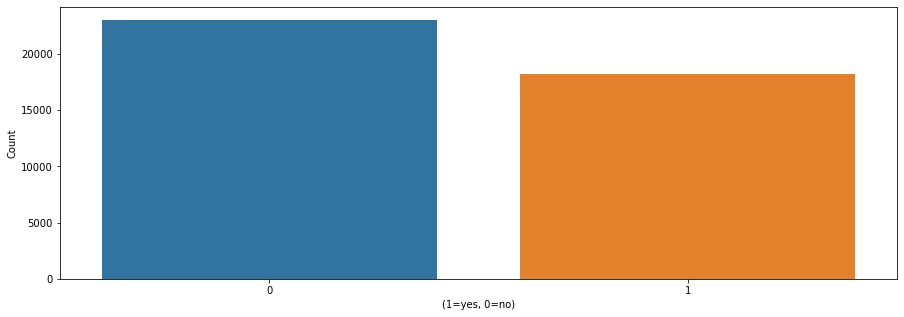

In [ ]:
df_fashion_news = pd.DataFrame([fashion_news]).T.reset_index()
df_fashion_news.columns = ("(1=yes, 0=no)","Count")
df_fashion_news
plt.figure(figsize=(15,5))
sns.barplot(x='(1=yes, 0=no)', y='Count', data=df_fashion_news)
plt.xticks(rotation=0)
plt.show()

We then try to understand if the fact to be subscribed or not is connected somehow to the age_group, so we create a dataframe in which for each age group we see the number of customers subscribed and number of customers that are not.

In [ ]:
fashion_general = df_customers.groupby(["age_group","fashion_news"]).count().reset_index()
fashion_general = fashion_general.drop(columns=["club_member","age"])
fashion_general.columns = ("age_group","fashion_news","count")
fashion_general

,age_group,fashion_news,count
0,15-24,0,6045
1,15-24,1,5031
2,25-34,0,8804
3,25-34,1,5468
4,35-44,0,2762
5,35-44,1,2326
6,45-54,0,3902
7,45-54,1,3615
8,55-64,0,1313
9,55-64,1,1478


We plot it to have a visual representation and see how between people with more than 55 years the tendency is to be subscribed to fashion news, while between young customers there is an higher percentage of people not subscribed.

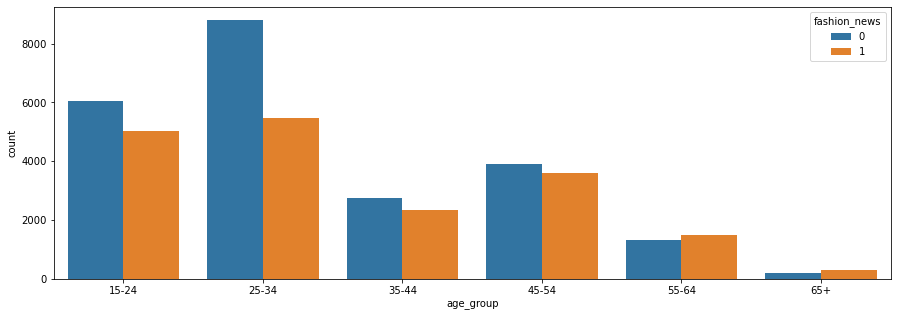

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='age_group', y='count',hue="fashion_news", data=fashion_general)
plt.xticks(rotation=0)
plt.show()

### CLUB MEMBERSHIP

We repeat the same passages for the Club Membership where more or less we obtain the same results, with more people that are not part of the special club member.

In [ ]:
club_member = Counter(df_customers["club_member"])
club_member

Counter({1: 17975, 0: 23278})

In [ ]:
club_membership = pd.DataFrame([club_member]).T.reset_index()
club_membership.columns = ("(1=yes,0=no)","Count")
club_membership

,"(1=yes,0=no)",Count
0,1,17975
1,0,23278


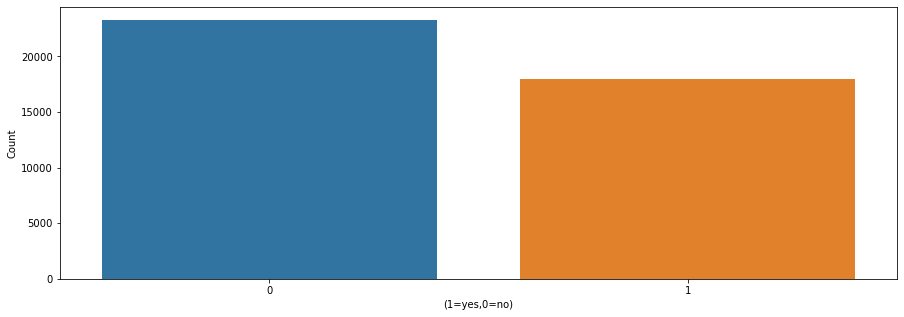

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='(1=yes,0=no)', y='Count', data=club_membership)
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_club_member = df_customers.groupby(["age_group","club_member"]).count().reset_index()
df_club_member = df_club_member.drop(columns=["fashion_news","age"])
df_club_member.columns = ("age_group","club_member","Count")
df_club_member

,age_group,club_member,Count
0,15-24,0,6139
1,15-24,1,4937
2,25-34,0,8875
3,25-34,1,5397
4,35-44,0,2789
5,35-44,1,2299
6,45-54,0,3933
7,45-54,1,3584
8,55-64,0,1328
9,55-64,1,1463


Also here people with more than 55 years is more probable that are going to be part of the special club member. 

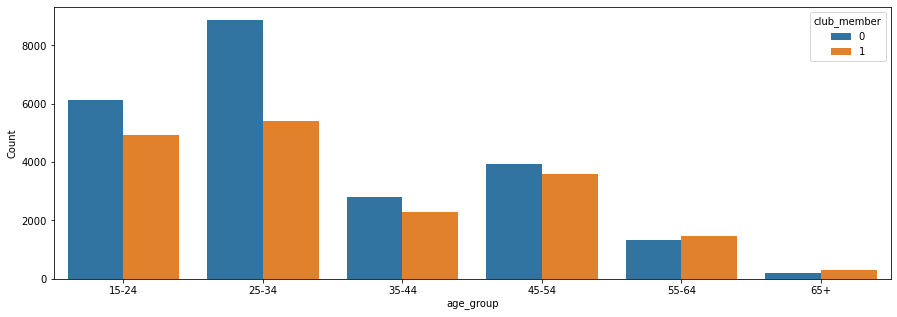

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='age_group', y='Count',hue="club_member", data=df_club_member)
plt.xticks(rotation=0)
plt.show()

## TRANSACTIONS

We import the last dataset which is the one concerning transactions. For each transaction we know when has been executed, from who and for what. Also here we print the first 5 rows and give a look at its shape. 

In [7]:
df_transactions = pd.read_csv("recsys_transactions.csv")
df_transactions.head()

,t_dat,customer_id,article_id
0,2020-09-02,7,599
1,2020-09-02,7,2600
2,2020-09-02,7,2063
3,2020-09-02,7,5188
4,2020-09-02,17,5111


In [ ]:
df_transactions.shape

(369113, 3)

We look for NaN values and we're lucky not to find them.

In [ ]:
df_transactions.isnull().sum()

t_dat          0
customer_id    0
article_id     0
dtype: int64

By the way one important thing is that this dataset is connected to the other ones, so for example can contain transactions of articles that  we have deleted before beacuse of the 'Unknwon' values. For this reason we create a copy of it called 'transactions' in which we exclude the articles we have deleted before and look at its shape.

In [ ]:
articles2 = list(articles["article_id"])
transactions = df_transactions.query("article_id in @articles2")
transactions.shape

(357535, 3)

A relevant step in EDA could be to look at the number of unique customers, articles and the average transactions made by customers or the ones per article. 

In [ ]:
n_transactions = len(transactions)
n_articles = transactions['article_id'].nunique()
n_customers = transactions['customer_id'].nunique()

print(f"Number of transactions: {n_transactions}")
print(f"Number of unique articles: {n_articles}")
print(f"Number of unique customers: {n_customers}")
print(f"Average number of transactions per customer: {round(n_transactions/n_customers, 2)}")
print(f"Average number of transactions per article: {round(n_transactions/n_articles, 2)}")

Number of transactions: 357535
Number of unique articles: 6328
Number of unique customers: 41238
Average number of transactions per customer: 8.67
Average number of transactions per article: 56.5


## Dates

We count how many transactions are done in each single day and discover that 2020-09-09 has been the day with more transactions executed. Through the visual representation we can see the distribution over the different days.

In [ ]:
t_dat = Counter(transactions["t_dat"])
df_t_dat = pd.DataFrame([t_dat]).T.reset_index()
df_t_dat.columns = ("data","Count")
df_t_dat = df_t_dat.sort_values(by="data",ascending=True)
df_t_dat

,data,Count
0,2020-09-02,13464
1,2020-09-03,17985
2,2020-09-04,16247
3,2020-09-05,18511
4,2020-09-06,16419
5,2020-09-07,18910
6,2020-09-08,18035
7,2020-09-09,20600
8,2020-09-10,19029
9,2020-09-11,17590


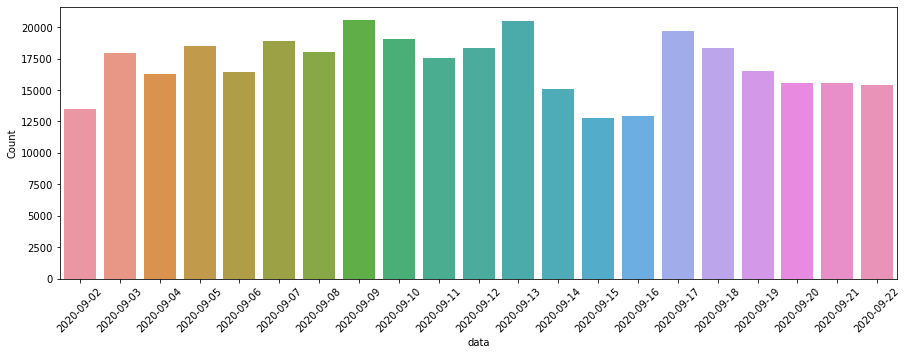

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='data', y='Count', data=df_t_dat)
plt.xticks(rotation=45)
plt.show()

## Transactions per customer

We want first of all a dataframe wich states for each customer the number of transactions for each article.

In [ ]:
customer_transactions = transactions.groupby(["customer_id","article_id"]).count().reset_index()
customer_transactions.columns = ("customer_id","article_id","transactions")
customer_transactions

,customer_id,article_id,transactions
0,0,463,1
1,0,5571,1
2,0,6120,1
3,1,617,1
4,1,680,1
...,...,...,...
297146,41252,350,1
297147,41252,1184,1
297148,41252,1340,1
297149,41252,1974,1


We need now a dataframe which states for each user the number of transactions made and we proceed using Counter and creating the dataframe for it.

In [ ]:
customer_id = Counter(transactions["customer_id"])
customer = pd.DataFrame([customer_id]).T.reset_index()
customer.columns = ("customer_id","transactions")
customer = customer.sort_values(by="customer_id",ascending = True).reset_index()
customer = customer.drop(columns="index")
customer.head()

,customer_id,transactions
0,0,3
1,1,7
2,2,9
3,3,7
4,4,16


As before with the age group we decide to assign each customer to a transaction group according to the number of transactions made in order to get better insights from data. Afterwards we modify the dataset of customers in order to combine informations.

In [ ]:
bins = [1,6,11,19,30,104]
transaction_group = ["1-5","6-10","11-18","19-30","30+"]
customer["transaction_group"] = pd.cut(customer["transactions"],bins, labels = transaction_group, include_lowest = True)
customer["fashion_news"] = df_customers["fashion_news"]
customer["club_member"] = df_customers["club_member"]
customer["age_group"] = df_customers["age_group"]
customer.head()

,customer_id,transactions,transaction_group,fashion_news,club_member,age_group
0,0,3,1-5,1,1,35-44
1,1,7,6-10,1,1,25-34
2,2,9,6-10,0,0,25-34
3,3,7,6-10,0,0,15-24
4,4,16,11-18,0,0,15-24


Now we're asking for each age group how transactions groups are spread and plot the results.

In [ ]:
new = customer.groupby(["age_group","transaction_group"]).count().reset_index()
new = new.drop(columns=["transactions","fashion_news","club_member"])
new.columns = ("age_group","transaction_group","count")
new.head()

,age_group,transaction_group,count
0,15-24,1-5,4519
1,15-24,6-10,4568
2,15-24,11-18,1557
3,15-24,19-30,341
4,15-24,30+,84


Another time it is easy to notice that in each age_group the transactions groups that have an higher frequency are '1-5' and '6-10'. People of more than 55 years have an higher probability of making '1-5' transactions than '6-10'. 

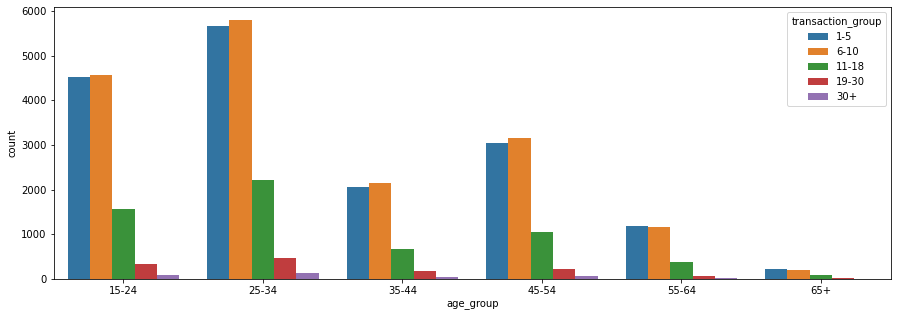

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='age_group', y='count',hue="transaction_group", data=new)
plt.xticks(rotation=0)
plt.show()

## Transactions per article

We need a dataframe which states for each article the number of transactions made and we proceed using Counter and creating the dataframe for it. The article with more transactions is article 1419 with 1045 transactions. 

In [ ]:
article_id = Counter(df_transactions["article_id"])
article = pd.DataFrame([article_id]).T.reset_index()
article.columns = ("article","count")
article = article.sort_values(by="count",ascending=False).reset_index()
article = article.drop(columns="index")
article.head()

,article,count
0,1419,1045
1,168,896
2,5831,889
3,6166,858
4,1429,815


Now we are done with data exploration and we can finally build our collaborative filtering recommender system.

The first step of collaborative filtering is to transform our data into a user-item matrix also known as a "utility" matrix. In this matrix, rows represent article_id and columns represent customer_id. There's no need of additional information.

## COLLABORATIVE FILTERING RECOMMENDER

The dataset we're going to use for our recommender system is going to be 'customer_transactions'.

In [ ]:
customer_transactions.head()

,customer_id,article_id,transactions
0,0,463,1
1,0,5571,1
2,0,6120,1
3,1,617,1
4,1,680,1


We need these dictionaries because they map which row and column of the utility matrix corresponds to which article id.'article_mapper' maps article id to article index, while 'article_inv_mapper' maps article indes to article id. 

In [ ]:
N = customer_transactions['customer_id'].nunique()
M = customer_transactions['article_id'].nunique()

article_mapper = dict(zip(np.unique(customer_transactions['article_id']), list(range(M))))
article_inv_mapper = dict(zip(list(range(M)), np.unique(customer_transactions['article_id'])))

article_index = [article_mapper[i] for i in customer_transactions['article_id']]

In [ ]:
# maps customer id to customer index
customer_mapper = dict(zip(np.unique(customer_transactions['customer_id']), list(range(N))))
# maps customer index to customer id
customer_inv_mapper = dict(zip(list(range(N)), np.unique(customer_transactions['customer_id'])))

customer_index = [customer_mapper[i] for i in customer_transactions['customer_id']]

We're going to use the 'crs_matrix' function, which stores the data sparsely.

In [ ]:
from scipy.sparse import csr_matrix
X = csr_matrix((customer_transactions["transactions"], (article_index, customer_index)), shape=(M, N))
X

<6328x41238 sparse matrix of type '<class 'numpy.int64'>'
	with 297151 stored elements in Compressed Sparse Row format>

User-item matrices are typically very sparse. A general rule of thumb is that the matrix sparsity should be no lower than 0.5% to generate decent results. As we can see we have a matrix sparsity of 0.11% so we can't proceed with our system but instead we have to try to increase the sparsity.

In [ ]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.11%


How can we do that? One way can be to reduce the number of customers taken in consideration. This beacuse in a user-based recommender system transactions made by customers are very important. They give for example information on how many articles the customer has bought and from there we can try to understand how many articles he/she is going to buy in the future. It could be helpful to delete the customers with a low number of transactions since they're not fundamental for our system.

To make a general idea on the number of transactions made by customer, at the beginning we found out that the average number of transactions per customer is 9, so we now try to look at the percentage of customers that made more than 24 transactions. Actually the percentage is very low, almost 2%, but we need that in order to  increase sparsity.

In [ ]:
customer_count_dict = {}
len_ = 0
num = 0
sum_ = 0
n = 24
for i,row in customer.iterrows():
    customer_count_dict[row["customer_id"]]= row["transactions"]
for b in customer_count_dict.values():
    len_ += 1
    if b>n:
        num += 1
    else:
        sum_ +=1

print(f"Number of customers that made less or equal than {n} transactions: {sum_}\n")
print(f"Number of customers that made more than {n} transactions: {num}\n")
print(f"Percentage of customers that made less or equal than {n} transactions: {round((sum_/len_ * 100),2)}% \n")
print(f"Percentage of customers that made more than {n} transactions : {round((num/len_ *100),2)}% \n")

Number of customers that made less or equal than 24 transactions: 40490

Number of customers that made more than 24 transactions: 748

Percentage of customers that made less or equal than 24 transactions: 98.19% 

Percentage of customers that made more than 24 transactions : 1.81% 



Afterwards we select from the datset 'customer' all the customers that made more than 24 transactions and create a sort of copy of 'customer_transactions' that we call 'customer2' in which we have only customers with more than 24 transactions.

In [ ]:
customer_new = customer[customer["transactions"] > 24]
customer_new_list = list(Counter(customer_new["customer_id"]))
customer2 = customer_transactions.query("customer_id in @customer_new_list")
customer2

,customer_id,article_id,transactions
666,97,989,1
667,97,1781,3
668,97,1906,2
669,97,2150,1
670,97,2152,2
...,...,...,...
296832,41209,4324,1
296833,41209,4525,2
296834,41209,4655,1
296835,41209,5773,1


First we repeat the steps done before using the new dataset.

In [ ]:
N2 = customer2['customer_id'].nunique()
M2 = customer2['article_id'].nunique()

article_mapper2 = dict(zip(np.unique(customer2['article_id']), list(range(M2))))
article_inv_mapper2 = dict(zip(list(range(M2)), np.unique(customer2['article_id'])))

article_index2 = [article_mapper2[i] for i in customer2['article_id']]

In [ ]:
# maps customer id to customer index
customer_mapper2 = dict(zip(np.unique(customer2['customer_id']), list(range(N2))))
# maps customer index to customer id
customer_inv_mapper2 = dict(zip(list(range(N2)), np.unique(customer2['customer_id'])))

customer_index2 = [customer_mapper2[i] for i in customer2['customer_id']]

In [ ]:
from scipy.sparse import csr_matrix
X2 = csr_matrix((customer2["transactions"], (article_index2, customer_index2)), shape=(M2, N2))
X2

<4377x748 sparse matrix of type '<class 'numpy.int64'>'
	with 16527 stored elements in Compressed Sparse Row format>

The sparsity of our matrix has now increased arriving to 0,5% which is the lowest value that allows us to continue building our model. This is the maximum result we could achieve in order to increase sparsity and not losing too much information about the initial dataset.

In [ ]:
sparsity2 = X2.count_nonzero()/(X2.shape[0]*X2.shape[1])
print(f"Matrix sparsity: {round(sparsity2*100,2)}%")

Matrix sparsity: 0.5%


Finally we can build our recomender system using a kNN algorithm.
We are working in a M-dimensional space where M represents the number of articles in our X2 matrix. 

In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_similar_articles(article_id, X, k, metric='cosine'):
    neighbour_ids = []
    article_ind = article_mapper[article_id]
    article_vec = X[article_ind]
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(article_vec, return_distance=False)[0]
    neighbour_ids = [article_inv_mapper[n] for n in neighbour[1:]]
    
    prod_names = dict(zip(articles['article_id'], articles['prod_name']))
    prod_name = prod_names[article_id]
    
    if k<1:
        print("Please select at least one article to be recommended")
    if k==1:
        ind = neighbour_ids[0]
        main = prod_names[ind]
        art_recom_id = article_id_dict[main]
        print(f"Here there is some information regarding {prod_name}:\n")
        print(f"Colour: {perceived_colour_dict[article_id]}, Type: {prod_type_name_dict[article_id]}, Garment: {garment_dict[article_id]}, ID: {article_id} \n")
        print(f"Here you find the main recommendation for it: {main} \n")
        print(f"Here there is some information regarding {main} \n")
        print(f"Colour: {perceived_colour_dict[art_recom_id]}, Type: {prod_type_name_dict[art_recom_id]}, Garment: {garment_dict[art_recom_id]}, ID: {art_recom_id} \n")
    if k>1:
        top_rec = list(articles["prod_name"].iloc[[i for i in neighbour_ids]])
        print(f"Here there is some information regarding {prod_name}:\n")
        print(f"Colour: {perceived_colour_dict[article_id]}, Type: {prod_type_name_dict[article_id]}, Garment: {garment_dict[article_id]}, ID: {article_id} \n")
        print(f"\n Here you find the top {k} articles recommended for: {prod_name}\n")
        print(articles["prod_name"].iloc[[i for i in neighbour_ids]])
        for i in top_rec:
            art_recom_id = article_id_dict[i]
            print(f"Here there is some information regarding {i} \n")
            print(f"Colour: {perceived_colour_dict[art_recom_id]}, Type: {prod_type_name_dict[art_recom_id]}, Garment: {garment_dict[art_recom_id]}, ID: {art_recom_id} \n")

    return neighbour_ids

Our function takes as input the article_id, the new user-item utility matrix that we have built, the value k which is the number of articles to recommend and finally the metric which is the distance metric for kNN calculations.

In [ ]:
article_id = 25
similar_ids = find_similar_articles(article_id, X2, k=10, metric='cosine')

Here there is some information regarding Austin basic leather hip belt:

Colour: Brown, Type: Belt, Garment: Accessories, ID: 25 


 Here you find the top 10 articles recommended for: Austin basic leather hip belt

2021           Sascha pullover hoodie
4082    Spice Girl Rib Brazilian 3 pk
735                       Charlie Top
3200                SUPREME RW tights
2478                          Gigi HW
136                       Jacket Slim
3079                          Nortull
1195           Vintage Slim Ankle H.W
2290                  Superskinny (D)
2908                 CL EMB SMOCK TOP
Name: prod_name, dtype: object
Here there is some information regarding Sascha pullover hoodie 

Colour: Mole, Type: Hoodie, Garment: Jersey Basic, ID: 2021 

Here there is some information regarding Spice Girl Rib Brazilian 3 pk 

Colour: White, Type: Underwear bottom, Garment: Under-, Nightwear, ID: 4082 

Here there is some information regarding Charlie Top 

Colour: Pink, Type: Top, Garment: Jersey

We probably can't rely so much on this model as we have reduced the number of customers losing in this way a big part of data .

# Neural network based filtering system

In [1]:
!pip install -q tensorflow-recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 KB 3.3 MB/s eta 0:00:00


In [2]:
#importing necessary libraries
import os
from typing import Dict, Text
import tensorflow as tf
import tensorflow_recommenders as tfrs

# Preparing the datasets

We are going to constuct a retrieval model composed of two components:

1. A query model which produces the query representation (commonly a fixed-dimensionality embedding vector) by means of query features.

2. A candidate model which yields the candidate representation (an equally-sized vector) by utilizing the candidate features.

The outputs from the two models are then multiplied to compute a query-candidate affinity score, with higher values indicating a more fitting match between the query and the candidate.

To build and train this two-tower system, we will predict a collection of items from the list of articles that the customer has purchased previously. This implies that each product a user buys is a positive example, and each item they have not bought is an implicit negative example.

To fit and evaluate the model, we need to split it into a training and evaluation set. 
The recommended way is to split the data in chronological order, using older transactions to predict new ones.

In [ ]:
# Sort the data by the date column
transactions = transactions.sort_values('t_dat')

# Calculate the number of rows in the train set
train_size = int(len(transactions) * 0.8)

# Split the data into train and test sets
train_set = transactions.iloc[:train_size]
test_set = transactions.iloc[train_size:]

Transform the sets in the format needed:

In [ ]:
# txn is an abbreviation for transaction
df_customer_txn_train = train_set.groupby(['customer_id', 'article_id']).count().reset_index()
df_customer_txn_train.columns = ['customer_id', 'article_id', 'transactions']
df_customer_txn_train

,customer_id,article_id,transactions
0,0,463,1
1,0,5571,1
2,0,6120,1
3,0,6440,1
4,1,617,1
...,...,...,...
246817,41252,350,1
246818,41252,1184,1
246819,41252,1340,1
246820,41252,1974,1


In [ ]:
df_customer_txn_test = test_set.groupby(['customer_id', 'article_id']).count().reset_index()
df_customer_txn_test.columns = ['customer_id', 'article_id', 'transactions']
df_customer_txn_test

,customer_id,article_id,transactions
0,1,2671,1
1,2,682,1
2,2,1955,1
3,4,18,1
4,4,168,1
...,...,...,...
62240,41243,5941,1
62241,41243,5970,2
62242,41243,6309,1
62243,41244,2840,1


Convert the Pandas DataFrames into TensorFlow datasets, to make them suitable to the machine learning library:

In [ ]:
df_customer_txn_train = tf.data.Dataset.from_tensor_slices(dict(df_customer_txn_train))
df_customer_txn_test = tf.data.Dataset.from_tensor_slices(dict(df_customer_txn_test))

Now select the most appropriate article features for the model:

In [ ]:
articles[["article_id","prod_name","index_name","perceived_colour_value_name","colour_group_name","garment_group_name"]]

,article_id,prod_name,index_name,perceived_colour_value_name,colour_group_name,garment_group_name
0,0,20 den 1p Stockings,Lingeries/Tights,Dark,Black,Socks and Tights
1,1,Shape Up 30 den 1p Tights,Lingeries/Tights,Dark,Black,Socks and Tights
2,2,Support 40 den 1p Tights,Lingeries/Tights,Dark,Black,Socks and Tights
3,3,200 den 1p Tights,Lingeries/Tights,Dark,Black,Socks and Tights
4,4,Control Top 50 den 1p Tights,Lingeries/Tights,Dark,Black,Socks and Tights
...,...,...,...,...,...,...
6531,6531,Virgo sweater fast buy,Divided,Dark,Black,Jersey Fancy
6532,6532,Virgo sweater fast buy,Divided,Dusty Light,Pink,Jersey Fancy
6533,6533,Heavy plain overknee tights 1p,Lingeries/Tights,Dark,Black,Socks and Tights
6534,6534,SPORT Malaga tank,Ladieswear,Dark,Black,Jersey Fancy


Construct a dataset which contains, for each customer, a list of every article they bought:

In [ ]:
customer_purchases = transactions.groupby("customer_id")['article_id'].apply(list)

Now let's locate the distinct values for articles and customers id.

This is essential because we must have the capacity to map the unprocessed values of our categorical features to embedding vectors in our models. 

In [ ]:
customer_ids = list(customer["customer_id"].unique())
article_ids = list(articles["article_id"].unique())

# Implementing the model

Selecting the proper architecture is a crucial step in constructing a model. 

As we are constructing a two tower retrieval model, we can construct each tower individually and then join them in the final model.

### The query tower

Let's start with the query tower.

The first step is to decide on the dimensionality of the query and candidate representations:

In [ ]:
embedding_dimension = 128


Higher values will correspond to models that may be more accurate, yet will also be slower to fit and it will be more susceptible to overfitting.

To define the model, we will utilize Keras preprocessing layers to change customer ids to embeddings via an `Embedding` layer. 


In [ ]:
user_model = tf.keras.Sequential([
  tf.keras.layers.Embedding(len(customer_ids) + 1, embedding_dimension)
])

### The candidate tower

We can do the same for the candidate tower

In [ ]:
article_model = tf.keras.Sequential([
  tf.keras.layers.Embedding(len(article_ids) + 1, embedding_dimension)
])

### Metrics

In our training data we have (customer, articles) pairs. To figure out how good our model is, we need to compare the affinity score that the model calculates for this pair to the scores of all the other possible candidates: if the score for the positive pair is higher than for all other candidates, our model is highly accurate.

To do this, we can use the `tfrs.metrics.FactorizedTopK` metric. The metric has one required argument: the dataset of candidates that are used as implicit negatives for evaluation.

In our case, that's the `df_articles` dataset, converted into embeddings via our article model:

In [ ]:
article_ids = tf.data.Dataset.from_tensor_slices(article_ids)

metrics = tfrs.metrics.FactorizedTopK(
  candidates=article_ids.batch(128).map(article_model)
)

### Loss

The next component is the loss used to train our model.

In this instance, we'll make use of the `Retrieval` task object: a convenience wrapper that bundles together the loss function and metric computation:



In [ ]:
task = tfrs.tasks.Retrieval(
  metrics=metrics
)

### The full model

We can now put it all together into a model. We will use the TensorFlow base model class (`tfrs.models.Model`) which streamlines building models: all we need to do is to set up the components in the `__init__` method, and implement the `compute_loss` method, taking in the raw features and returning a loss value.

The base model will then take care of creating the appropriate training loop to fit our model.

In [ ]:
class recsysModel(tfrs.Model):

  def __init__(self, user_model, article_model):
    super().__init__()
    self.article_model: tf.keras.Model = article_model
    self.user_model: tf.keras.Model = user_model
    self.task: tf.keras.layers.Layer = task

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    # We pick out the customer features and pass them into the user model.
    user_embeddings = self.user_model(features["customer_id"])
    # And pick out the articles features and pass them into the article model,
    # getting embeddings back.
    positive_article_embeddings = self.article_model(features["article_id"])

    # The task computes the loss and the metrics.
    return self.task(user_embeddings, positive_article_embeddings)

# Fitting and evaluating

After defining the model, we can use standard Keras fitting and evaluation routines to fit and evaluate the model.

Let's first instantiate the model.

In [ ]:
model = recsysModel(user_model, article_model)
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

Then shuffle, batch, and cache the training and evaluation data.



*   **Shuffling** is the process of randomly rearranging the data in a dataset. 
*   **Batching** is the process of dividing the data into smaller groups.
*   **Caching** is the process of storing the data in a temporary memory location for faster access.

These techniques are used to improve the efficiency of training and evaluation of machine learning models. Shuffling helps to reduce bias in the data, batching reduces the amount of data that needs to be processed at once, and caching helps to speed up the process of accessing the data.






In [ ]:
cached_train = df_customer_txn_train.shuffle(100_000).batch(8192).cache()
cached_test = df_customer_txn_train.batch(4096).cache()

Now we can train the model:

In [ ]:
model.fit(cached_train, epochs=3)

Epoch 1/3


31/31 [==============================] - 233s 7s/step - factorized_top_k/top_1_categorical_accuracy: 3.0791e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0155 - factorized_top_k/top_10_categorical_accuracy: 0.0294 - factorized_top_k/top_50_categorical_accuracy: 0.0808 - factorized_top_k/top_100_categorical_accuracy: 0.1149 - loss: 69337.7892 - regularization_loss: 0.0000e+00 - total_loss: 69337.7892
Epoch 2/3
31/31 [==============================] - 227s 7s/step - factorized_top_k/top_1_categorical_accuracy: 0.0083 - factorized_top_k/top_5_categorical_accuracy: 0.1402 - factorized_top_k/top_10_categorical_accuracy: 0.2246 - factorized_top_k/top_50_categorical_accuracy: 0.4333 - factorized_top_k/top_100_categorical_accuracy: 0.5379 - loss: 61955.6055 - regularization_loss: 0.0000e+00 - total_loss: 61955.6055
Epoch 3/3
31/31 [==============================] - 232s 7s/step - factorized_top_k/top_1_categorical_accuracy: 0.0101 - factorized_top_k/top_5_categorical_accuracy: 0.2689 - 

And test it:

In [ ]:
model.evaluate(cached_test, return_dict=True)

61/61 [==============================] - 159s 3s/step - factorized_top_k/top_1_categorical_accuracy: 0.0871 - factorized_top_k/top_5_categorical_accuracy: 0.5408 - factorized_top_k/top_10_categorical_accuracy: 0.7459 - factorized_top_k/top_50_categorical_accuracy: 0.9329 - factorized_top_k/top_100_categorical_accuracy: 0.9652 - loss: 17580.7719 - regularization_loss: 0.0000e+00 - total_loss: 17580.7719


{'factorized_top_k/top_1_categorical_accuracy': 0.08712351322174072,
 'factorized_top_k/top_5_categorical_accuracy': 0.540762186050415,
 'factorized_top_k/top_10_categorical_accuracy': 0.7459383606910706,
 'factorized_top_k/top_50_categorical_accuracy': 0.9328949451446533,
 'factorized_top_k/top_100_categorical_accuracy': 0.9651733040809631,
 'loss': 3613.655029296875,
 'regularization_loss': 0,
 'total_loss': 3613.655029296875}

We can see that the model performed very well on the test set. In fact, it has factorized top 100 categorical accuracy of over 96%, and of 93% for top 50. That's even higher than the train.

This is probabably due to the fact that we reduced the articles features to avoid overfitting and to have a more generalized model. 

# Making predictions

Now that we have a model, we can use the `tfrs.layers.factorized_top_k.BruteForce` layer to make predictions.

In [ ]:
# Create a model that takes in raw query features, and
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
# recommends articles out of the entire dataset.
index.index_from_dataset(
  tf.data.Dataset.zip((article_ids.batch(100), article_ids.batch(100).map(model.article_model)))
)

Now we create a function that takes as input a customer id and returns in readable format the top 5 articles recommendations:

In [ ]:
def recSys(id):
  t = 0 # Items counter
  c = 1 # Position counter
  lst = customer_purchases[id] # List of items already purchased by customer
  _, recommended_ids = index(tf.constant([id]))
  recommendations = []

  while len(recommendations) < 5:
    if int(recommended_ids[0][t]) not in lst:
      recommendations.append(int(recommended_ids[0][t]))
    t += 1

  print(f"Recommendations for Customer {id}:")

  for i in recommendations:
    print(f"{c}. {articles[articles.article_id == i].colour_group_name.iloc[0]} {articles[articles.article_id == i].prod_name.iloc[0]}. ID: {i}")
    c += 1

In [ ]:
recSys(9505)

Recommendations for Customer 9505:
1. Beige Jodi utility shirt dress. ID: 3364
2. Light Pink Twist jumpsuit. ID: 4066
3. Other Orange Wakkiki. ID: 2323
4. White Emily. ID: 3126
5. White Harper strap dress. ID: 2320
